In [8]:
import os, warnings, glob
import numpy as np
from obspy import read, UTCDateTime
from obspy.geodetics import gps2dist_azimuth as gda
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [6]:
filePath = 'C:\\Users\\zhanghc\\Desktop\\20160416012500\\20160416012500.kik.tar\\20160416012500.kik'
os.chdir(filePath)
files = glob.glob('*EW1')
# print(files)

         network: BO
         station: AICH09
        location: 
         channel: EW1
       starttime: 2016-04-15T16:27:49.000000Z
         endtime: 2016-04-15T16:29:55.990000Z
   sampling_rate: 100.0
           delta: 0.01
            npts: 12700
           calib: 3.5772741681530435e-06
         _format: KNET
        distance: 649.8090845193054
            knet: AttribDict({'evot': UTCDateTime(2016, 4, 15, 16, 25), 'evla': 32.753, 'evlo': 130.762, 'evdp': 12.0, 'mag': 7.3, 'stla': 34.6643, 'stlo': 137.3902, 'stel': -300.0, 'duration': 127.0, 'accmax': 0.559, 'last correction': UTCDateTime(2016, 4, 15, 16, 27, 49), 'dist': 649.8090845193054})


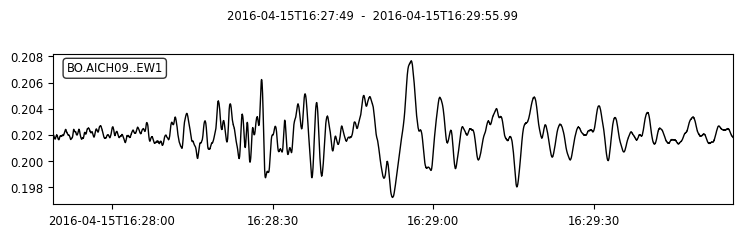

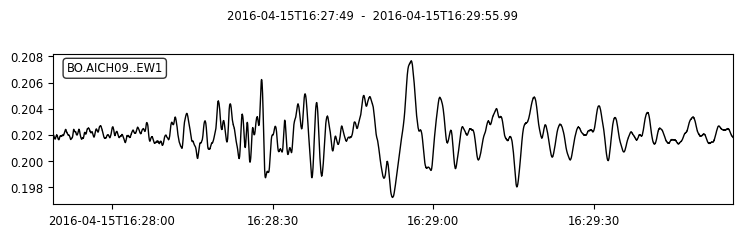

In [10]:
#
tr = read(files[0])
tr[0].stats.distance = gda(tr[0].stats.knet.evla, tr[0].stats.knet.evlo, tr[0].stats.knet.stla, tr[0].stats.knet.stlo)[0]/1000.
print(tr[0].stats)
tr.plot()


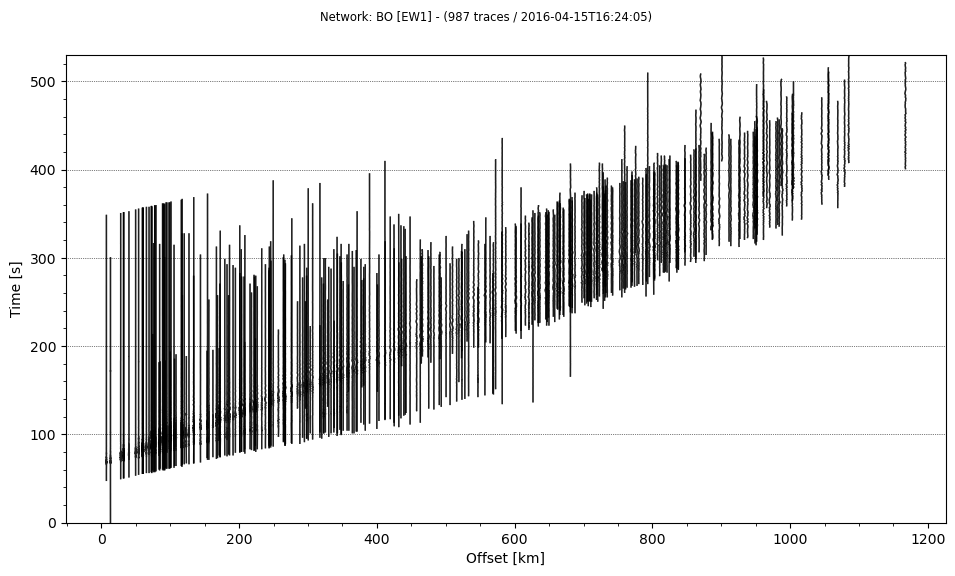

In [14]:

for file in files:
    try:
        st += read(file)
    except:
        st = read(file)

for tr in st:
    tr.detrend('linear')
    tr.detrend('demean')
    tr.stats.distance = gda(tr.stats.knet.evla, tr.stats.knet.evlo, tr.stats.knet.stla, tr.stats.knet.stlo)[0]

st.plot(type='section')

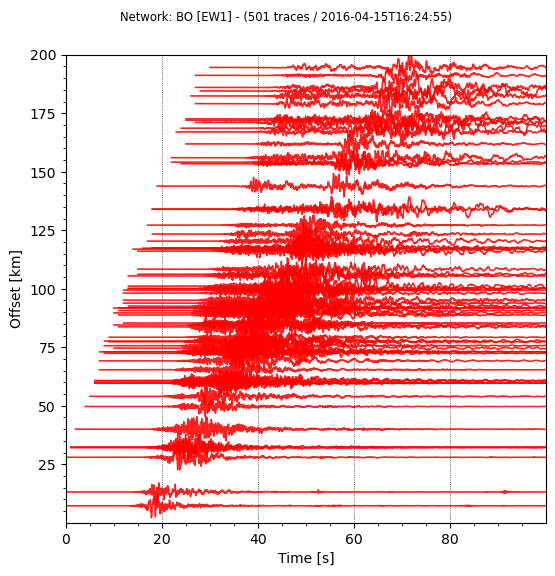

In [31]:
starttime = UTCDateTime('2016-04-15T16:24:55')
fig = st.plot(type='section', scale=8, offset_min=10, offset_max=200000, 
              time_down=False, orientation='horizontal', size=(600, 600),
              starttime=starttime, endtime=starttime+100, color='r')


Text(0, 0.5, 'PGA (gal)')

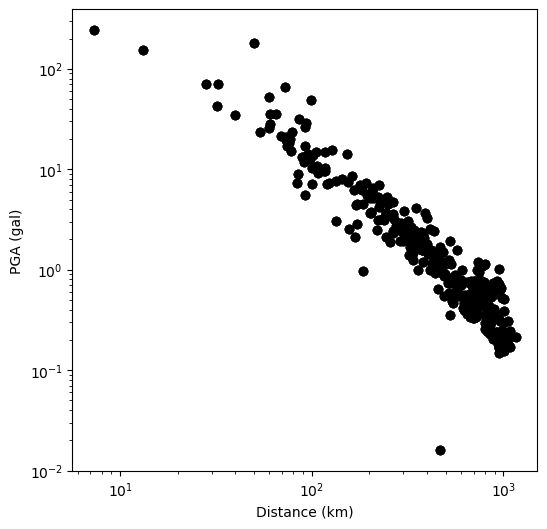

In [35]:
fig = plt.figure(1, figsize=(6, 6))
for tr in st:
    plt.loglog(tr.stats.distance/1000., tr.stats.knet.accmax, 'ko')

plt.xlabel('Distance (km)')
plt.ylabel('PGA (gal)')